In [1]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [8]:
df_folds = pd.read_csv("../data/fold_data/df_folds.csv")
df_folds.drop('cus_dob', axis=1, inplace=True)
df_folds.head()

,age,cus_month_income,cus_gender,cus_marital_status,cus_customer_since,years_with_us,total_debit_trans_s1,total_debit_trans_s2,total_debit_trans_s3,total_debit_amt_s1,...,total_credit_amt_s3,total_debit_amt,total_debit_trans,total_credit_amt,total_credit_trans,total_transactions,cus_target,tar_desc,status,kfold
0,42,2.000000e+06,MALE,SINGLE,2005-09-05,14,1,6,1,817.02,...,0.00,27700.34,8,0.00,0,8,2222,MIDLE,ACTIVE,0
1,41,2.000000e+06,MALE,SINGLE,2005-05-23,14,13,6,6,9760362.69,...,389959.36,12868216.67,25,5014366.36,21,46,2211,PLATINUM,ACTIVE,5
2,56,3.421863e-03,MALE,SINGLE,1995-03-17,24,26,20,0,255579.65,...,0.00,297687.54,46,0.00,0,46,2222,MIDLE,CHURN,5
3,50,1.000000e+06,MALE,MARRIED,2005-09-29,14,18,16,17,38900.00,...,49730.34,123093.60,51,131133.33,21,72,2223,LOW,ACTIVE,4
4,14,1.000000e+07,MALE,SINGLE,2005-08-12,14,8,0,0,24205.63,...,48857.23,24205.63,8,145053.11,36,44,2223,LOW,ACTIVE,6


In [9]:
bins = [0, 20, 30, 40, 50, 60, 70, 120]  # Define age groups
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']  # Labels for age groups
df_folds['age_group'] = pd.cut(df_folds['age'], bins=bins, labels=labels, right=False)


In [17]:
data  = df_folds.groupby('kfold')['status'].agg({'value_counts'}).reset_index()   
data

,kfold,status,value_counts
0,0,ACTIVE,103
1,0,CHURN,22
2,1,ACTIVE,103
3,1,CHURN,22
4,2,ACTIVE,102
5,2,CHURN,23
6,3,ACTIVE,102
7,3,CHURN,23
8,4,ACTIVE,102
9,4,CHURN,23


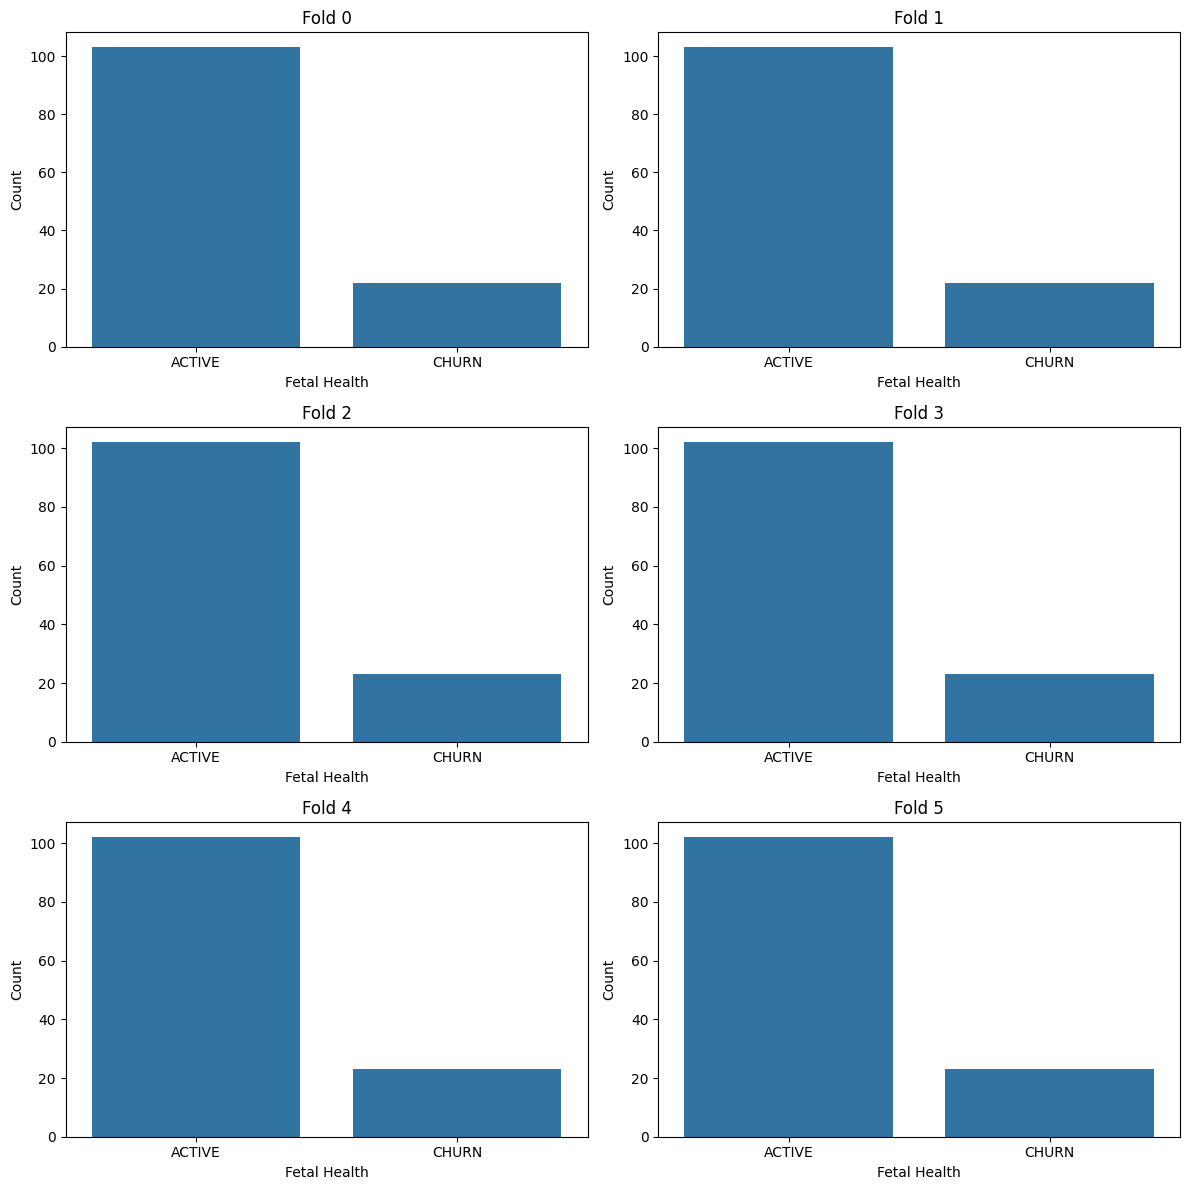

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Plot distribution for each fold
for i, ax in enumerate(axes.flat):
    fold_data = data[data['kfold'] == i]
    if not fold_data.empty:
        sns.barplot(data=fold_data, x='status', y='value_counts', ax=ax)
        ax.set_title(f'Fold {i}')
        ax.set_xlabel('Fetal Health')
        ax.set_ylabel('Count')
        
    else:
        break

plt.tight_layout()
plt.show()